In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import io, measure
from skimage.filters import try_all_threshold, threshold_yen,  threshold_otsu, threshold_triangle
import os, glob, shutil

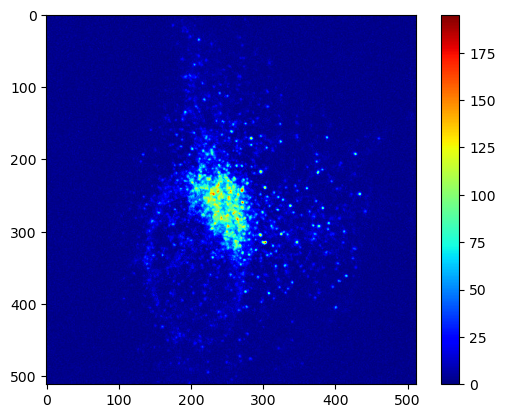

In [2]:
# Task 1
path_to_images = glob.glob(os.path.join('Challenge01_Images', '*.jpg'))
# print(path_to_images)

img_data = plt.imread(path_to_images[0])
plt.imshow(img_data, cmap = 'jet')
plt.colorbar()
plt.show()

img_data.dtype=dtype('uint8')
img_data.shape=(512, 512)
Max values = 195
img_data.min()=0
img_data.sum()=1678097


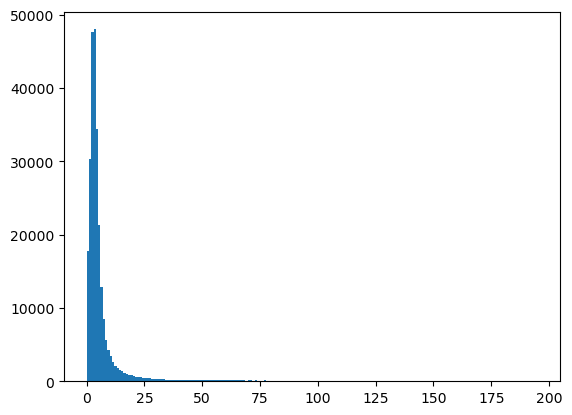

In [3]:
# Task 2
print(f'{img_data.dtype=}', 
      f'{img_data.shape=}', 
      f'Max values = {img_data.max()}',
      f'{img_data.min()=}',
      f'{img_data.sum()=}',
      sep = '\n')

#max and min values represent the maximum and minimum intensity of all the pixels in the image
#sum would represent the total intensity of all pixels

plt.hist(img_data.flatten(),bins=196)
plt.show()

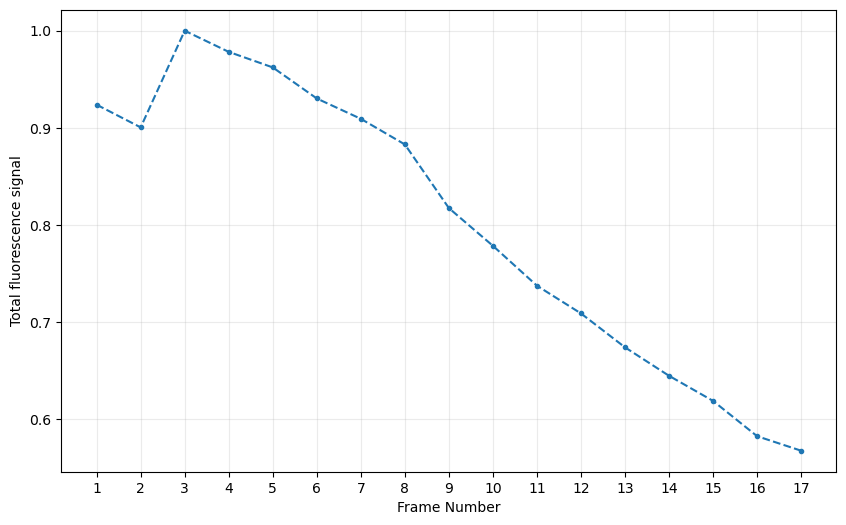

In [4]:
# Task 3
total_fluorescence = []
for path in path_to_images:
    img_data = plt.imread(path)
    total_fluorescence.append(img_data.sum())

total_fluorescence = np.array(total_fluorescence)
max_fluorescence = total_fluorescence.max()
fluo_ratio = total_fluorescence/max_fluorescence

#graphing
frames = np.arange(1,18)
fig = plt.figure(figsize = (10,6))
plt.plot(frames, fluo_ratio, marker = '.', ls='dashed')
plt.xticks(ticks = np.arange(1,18))
plt.grid(alpha = 0.25)
plt.ylabel('Total fluorescence signal', rotation = 90)
plt.xlabel('Frame Number')
plt.show()

# print(fluo_ratio)
# print(total_fluorescence)

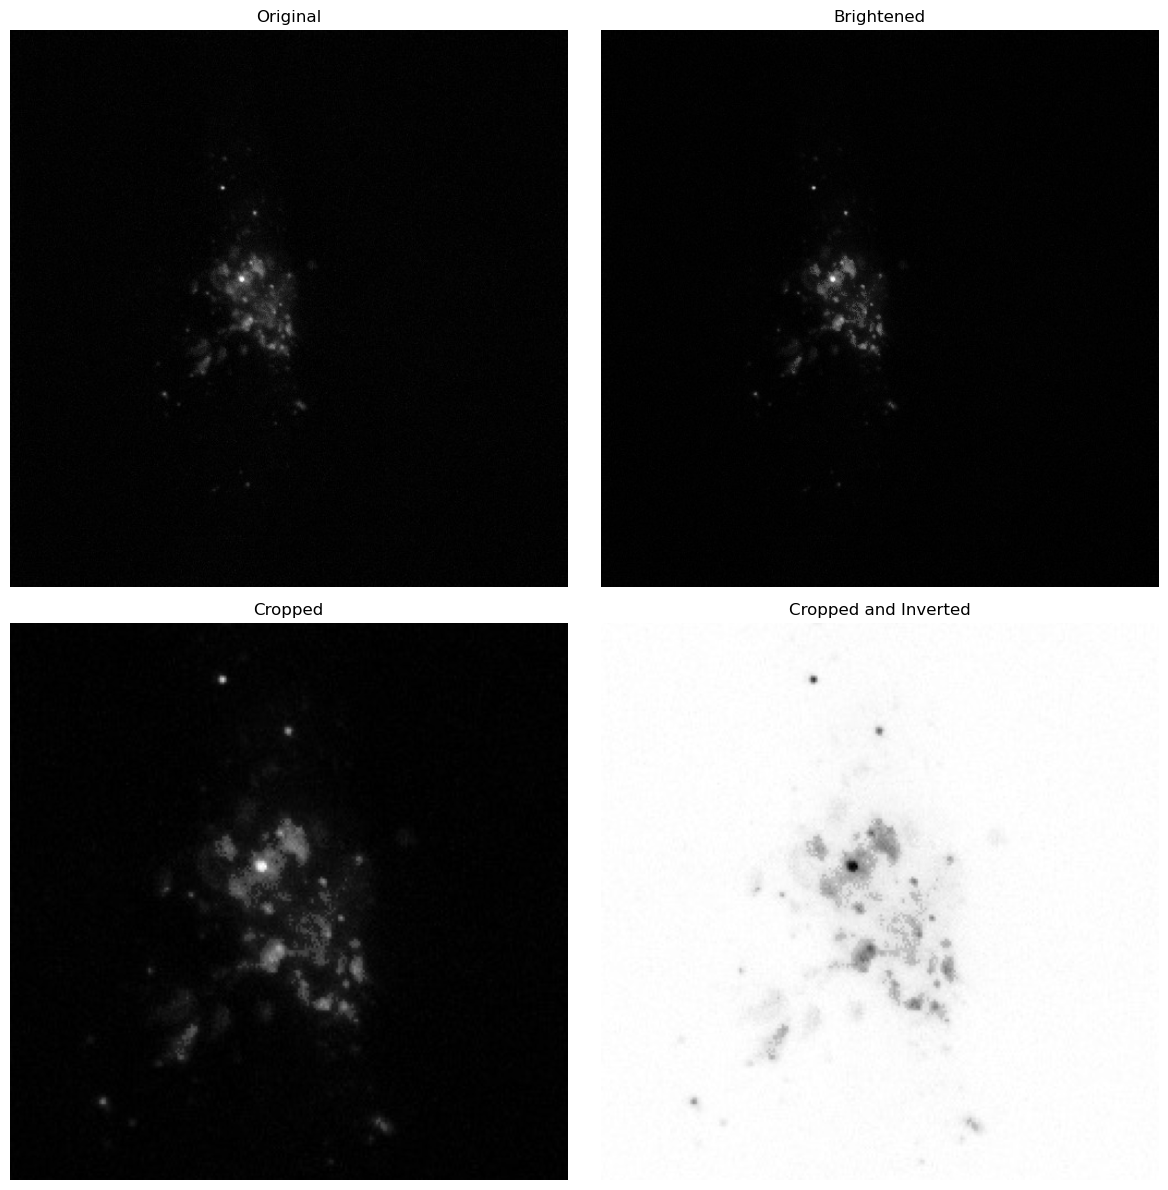

In [5]:
#Task 4
#frame 17 is last path in path_to_images
img_ori = plt.imread(path_to_images[-1])
img_new = img_ori.copy()
img_new = img_new.astype(float)

mask = img_new > 50
img_new[mask]*=1.5

img_crop = img_new[120:370,100:350]
max_fluorescence = img_crop.max()
img_final = max_fluorescence - img_crop

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize =(12,12))
images = [img_ori, img_new, img_crop, img_final]
titles = ['Original','Brightened','Cropped','Cropped and Inverted']
i=0
for a in ax.flatten():
    a.imshow(images[i], cmap='gray')
    a.axis('off')
    a.set_title(titles[i])
    i+=1
plt.tight_layout()
plt.show()

# n=np.argmax(img_ori)
# print(img_new.flatten()[n], img_new.dtype,img_ori.flatten()[n], sep = '\n')

# # plt.imshow(img_new, cmap = 'gray')
# # plt.colorbar()
# # plt.axis('off')
# # plt.show()

# img_uint8 = img_new.astype('uint8') #this is brightened image
# plt.imshow(img_uint8, cmap = 'gray')
# plt.colorbar()
# plt.show()



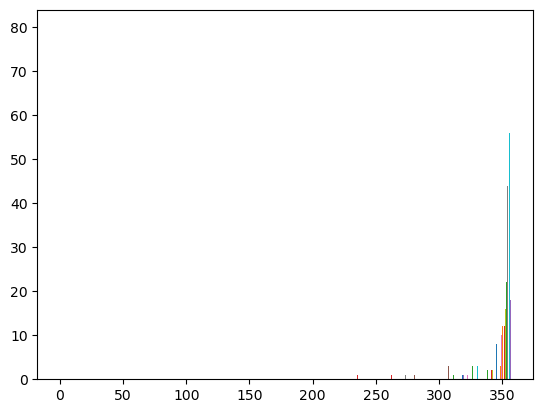

In [9]:
#task 5 histogram... idk what do u want me to do with this
n = int(img_final.max())
plt.hist(img_final,bins = n)
plt.show()

The equation used for inverting the image is `max_fluorescence - img_crop` where max_fluorescence is given by the maximum intensity of all the pixels within the image itself. Therefore, all values stored in `img_crop` are necessarily less than `max_fluorescence`.

Hence, `max_fluorescence - img_crop` $\geq 0$

In [ ]:
fig1, ax = try_all_threshold(img_new, figsize = (10,8), verbose=False)
plt.show()

img_filtered = img_new < threshold_triangle(img_new)
img_filtered = measure.label(img_filtered)
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(1,2,1)
ax.imshow(img_filtered, cmap = 'gray')
ax = fig.add_subplot(1,2,2)
ax.imshow(img_new, cmap = 'jet')



# print(img_filtered[200])
# measure.label() requires an image of type int
region_info = measure.regionprops(img_filtered)

no_of_regions = len(region_info)

print(f'Total area of image = {512*512}')
for count, region in enumerate(region_info):
    # print('-'*10, f'Region {count}', '-'*10)
    # print(f'Centre\t: {region.centroid}')
    # print(f'Area\t: {region.area}')            
    # print('\n')
    plt.plot(region.centroid[1],region.centroid[0],'+',color='r')

plt.show()

#this is to determine where the centre of the cropped image should be
# i just want it where it is considered in the centre of the largest group, but clearly that is not working